In [400]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('mushrooms.csv')

num_rows, num_features = df.shape
print("Number of rows:", num_rows)
print("Number of features:", num_features)

print()

print("\nDataset info:\n", df.info())

print("\nMissing values:\n", df.isnull().sum())

print("\nClass distribution:\n", df['class'].value_counts())

Number of rows: 8124
Number of features: 23

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 no

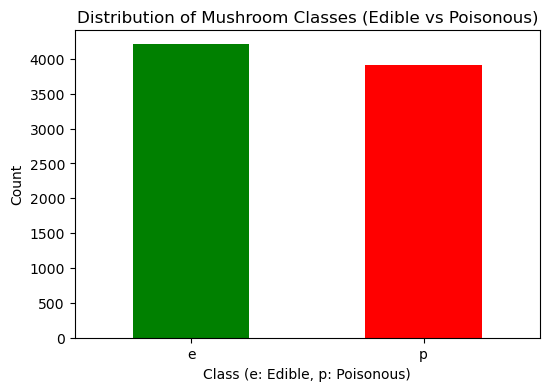

In [401]:
plt.figure(figsize=(6, 4))
df['class'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Mushroom Classes (Edible vs Poisonous)')
plt.xlabel('Class (e: Edible, p: Poisonous)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

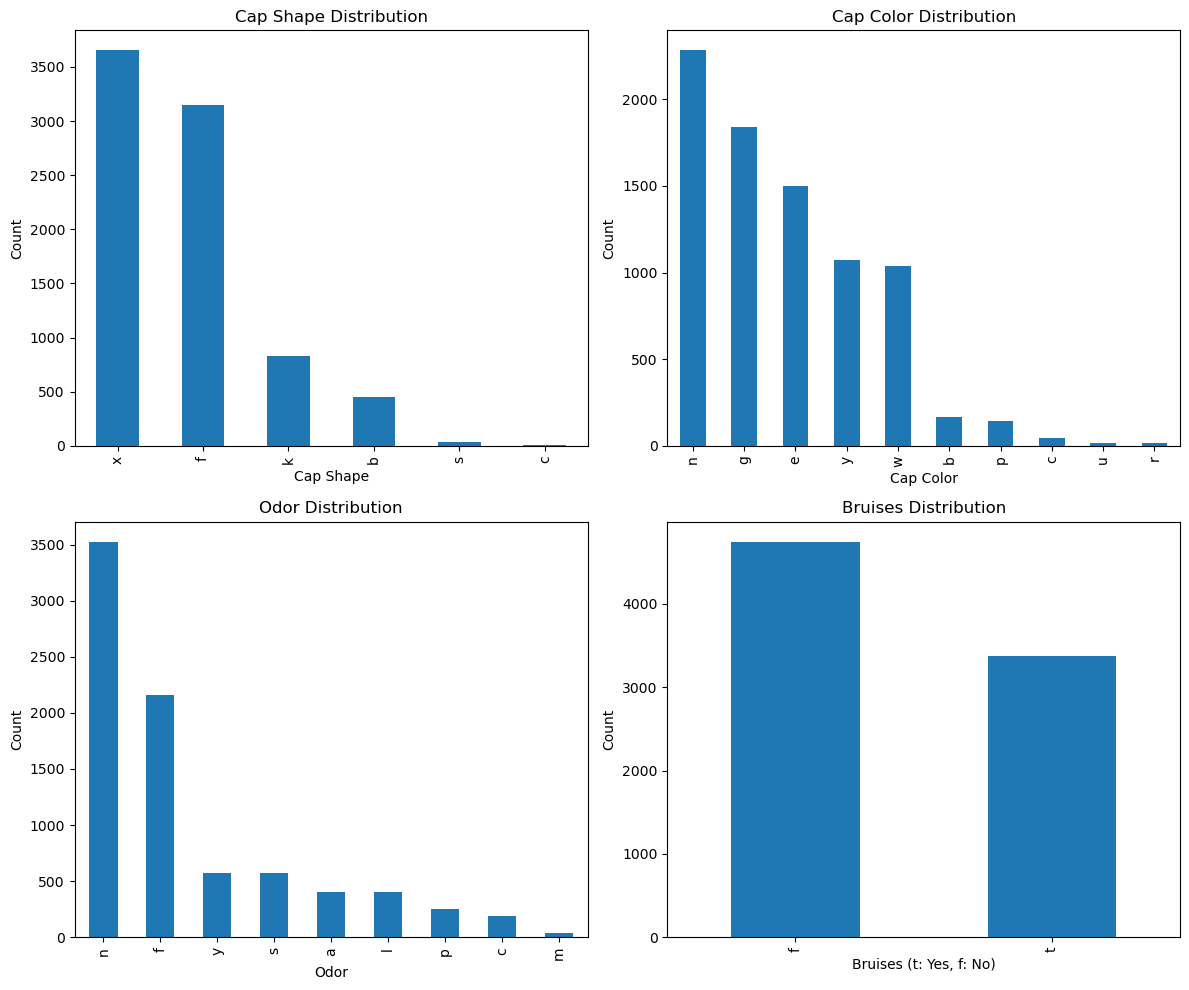

In [402]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Cap Shape
df['cap-shape'].value_counts().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Cap Shape Distribution')
axes[0, 0].set_xlabel('Cap Shape')
axes[0, 0].set_ylabel('Count')

# Cap Color
df['cap-color'].value_counts().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Cap Color Distribution')
axes[0, 1].set_xlabel('Cap Color')
axes[0, 1].set_ylabel('Count')

# Odor
df['odor'].value_counts().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Odor Distribution')
axes[1, 0].set_xlabel('Odor')
axes[1, 0].set_ylabel('Count')

# Bruises
df['bruises'].value_counts().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Bruises Distribution')
axes[1, 1].set_xlabel('Bruises (t: Yes, f: No)')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

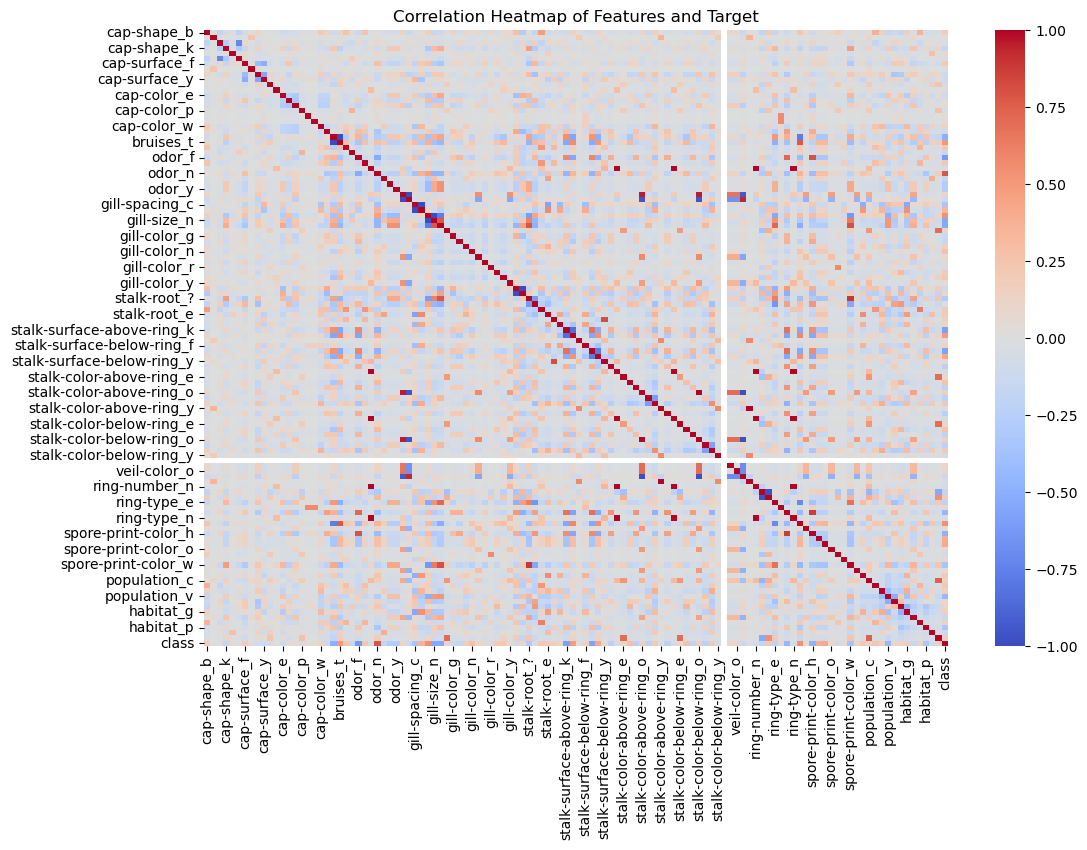

In [403]:
# just setting e to 1 and p to 0 for ease for the computer
df['class'] = df['class'].map({'e': 1, 'p': 0})

X = df.drop('class', axis=1)
y = df['class']

encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(X)
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(X.columns))
encoded_df['class'] = y

plt.figure(figsize=(12, 8))
sns.heatmap(encoded_df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap of Features and Target')
plt.show()

In [404]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([('cat', OneHotEncoder(), X_train.columns)])),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}, {accuracy_score(y_test, y_pred) *100:.2f}%")

Accuracy: 1.00, 100.00%
